# UT3 - Práctica 7

## Ejercicio 1

Antes de empezar a trabajar, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Función para pasar a grayscale

In [2]:
def colorToGrayscale2(img, r=0.2989, g=0.587, b=0.114):
    grayimg = img.copy()
    grayimg = (r*grayimg[:,:,0] + g*grayimg[:,:,1] + b*grayimg[:,:,2])/255 # Función para pasar rgb a grayscale
    return grayimg

Preparar la imagen para uso

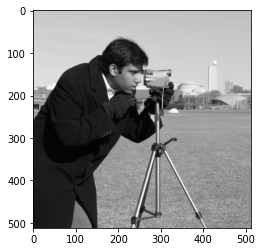

(512, 512)


In [3]:
img = colorToGrayscale2(plt.imread("07_camera.png"))
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

---
## Ejercicio 2

Haz una función que, recibiendo una imagen en escala de grises (2D) como parámetro y una máscara de tamaño 3x3, devuelva la imagen tras aplicar la máscara a cada píxel (guardando como nuevo valor del píxel la suma de todos los valores resultantes) a excepción de los bordes:

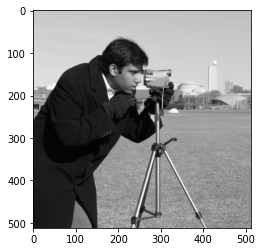

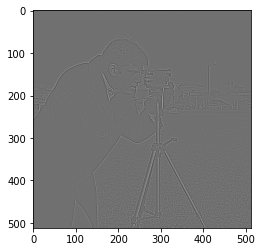

In [15]:
def maskAll(img, mask):
    imgMask = img.copy()
    f = 0
    for fila in imgMask:
        c = 0
        for columna in fila:
            imgMask[f,c] = masking(img, f, c, mask)
            c += 1
        f += 1
    return imgMask

def masking(img, f, c, mask):
    ret = 0
    for x in range(-1, 2, 1):
        for y in range(-1, 2, 1):
            if (f < img.shape[0]-1) and (c < img.shape[1]-1) and (f > 0) and (c > 0):
                ret += img[f+x, c+y] * mask[x+1, y+1]
    return ret

mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

plt.imshow(img, cmap="gray")
plt.show()
img2 = maskAll(img, mask)
plt.imshow(img2, cmap="gray")
plt.show()

---
## Ejercicio 3

Haz una función que, recibiendo una imagen en escala de grises (2D) como parámetro y un umbral, devuelva la imagen segmentada en base al umbral definido. Todo lo que esté por encima de dicho umbral deberá dar como resultado un valor de 1 en la imagen. Lo que esté por debajo tendrá un valor de 0:

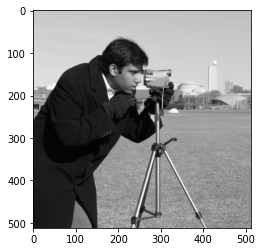

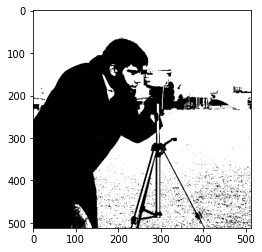

In [5]:
def umbraliza(img, val):
    copy = img.copy()
    f = 0
    for filas in copy:
        c = 0
        for columnas in filas:
            if columnas < val:
                copy[f,c] = 0
            elif columnas >= val:
                copy[f,c] = 1
            c += 1
        f += 1
    return copy

umbral = 0.5/255

plt.imshow(img, cmap="gray")
plt.show()

img3 = umbraliza(img, umbral)
plt.imshow(img3, cmap="gray")
plt.show()

---
## Ejercicio 4

Haz una función que, recibiendo como parámetro una imágen, una máscara y un umbral, primero aplique la máscara a la imagen, después la umbralice y por último devuelva la imagen resultante:

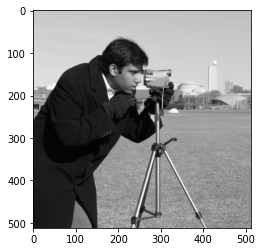

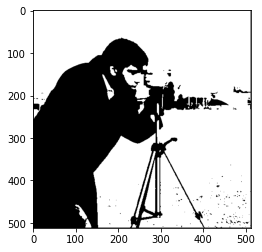

In [6]:
def both(img, mask, umbral):
    bothimg = img.copy()
    bothimg = umbraliza(maskAll(img, mask), umbral)
    return bothimg

mask = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
umbral = 0.5/255

plt.imshow(img, cmap="gray")
plt.show()

img3 = both(img, mask, umbral)
plt.imshow(img3, cmap="gray")
plt.show()

---
## Ejercicio 5

Haz distintas pruebas con cada una de las imágenes de la práctica. Entre ellas, probando con distintos umbrales, prueba a utilizar este tipo de máscaras:
* [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
* [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
* [[-1,2,-1],[-1,2,-1],[-1,2,-1]]
* [[2,-1,-1],[-1,2,-1],[-1,-1,2]]
* [[-1,-1,2],[-1,2,-1],[2,-1,-1]]
* [[-1,-1,-1],[0,0,0],[1,1,1]]
* [[-1,0,1],[-1,0,1],[-1,0,1]]
* [[-1,-2,-1],[0,0,0],[1,2,1]]
* [[-1,0,1],[-2,0,2],[-1,0,1]]

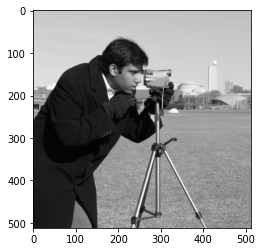

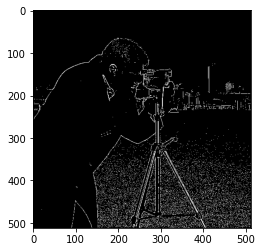

In [7]:
mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
umbral = 0.5/255

plt.imshow(img, cmap="gray")
plt.show()

img3 = both(img, mask, umbral)
plt.imshow(img3, cmap="gray")
plt.show()

---
## Ejercicio 6

Hasta ahora hemos aplicado las distintas máscaras y umbralizado de manera independiente. Ahora haz una función que, recibiendo la imagen, una lista de máscaras y un umbral, utilizando los distintos resultados obtenidos para la misma imagen con las máscaras y el umbral, unifique las imágenes obtenidas en una sola:

In [13]:
def manyMask(img, listamask, umbral):
    imgFin = np.zeros(img.shape)
    for mask in listamask:
        imgFin += both(img, mask, umbral)
    return imgFin >= 1

---
## Ejercicio 7

Realiza la composición de las imágenes obtenidas en el ejercicio 5 utilizando la función del ejercicio 6 y muéstralas por pantalla:

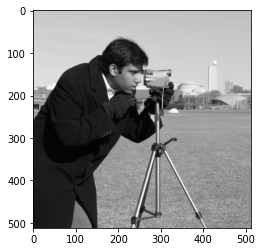

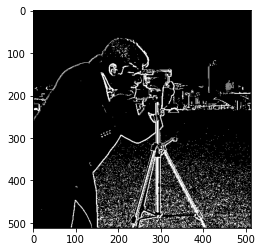

In [14]:
listamask = (   np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
                np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]),
                np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]),
                np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]]),
                np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]]),
                np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
                np.array([[-1,0,1],[-1,0,1],[-1,0,1]]),
                np.array([[-1,-2,-1],[0,0,0],[1,2,1]]),
                np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))

plt.imshow(img, cmap="gray")
plt.show()

img4 = manyMask(img, listamask, 0.5/255)
plt.imshow(img4, cmap="gray")
plt.show()